In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
matplotlib.rcParams.update({'font.size': 16}) 

import numpy as np


In [3]:
import rompy as rp

In [4]:
def polyfit7d_interpolant(x0,x1,x2,x3,x4,x5,x6,z1,deg):
    interpolant = rp.MultivariateFits([x0,x1,x2,x3,x4,x5,x6], z1, fit='polyfitnd', deg=deg)
    return interpolant

In [5]:
def gen_data(x):
    x0, x1, x2, x3, x4, x5, x6 = np.meshgrid(x, x, x, x, x, x, x)
    x0 = x0.ravel()
    x1 = x1.ravel()
    x2 = x2.ravel()
    x3 = x3.ravel()
    x4 = x4.ravel()
    x5 = x5.ravel()
    x6 = x6.ravel()
    z = np.sin(5 * x0) + .4 * np.sin(x1) + .2 * np.sin(x2) \
         + .9 * np.sin(x3) \
         + .3 * np.sin(x4) \
         + .1 * np.sin(x5) \
         + np.sin(x6)
    return x0, x1, x2, x3, x4, x5, x6, z

In [6]:
x = np.linspace(0, 1, 4)
x0, x1, x2, x3, x4, x5, x6, z = gen_data(x)

In [7]:
x_val = np.linspace(0, 1, 5)
x0_val, x1_val, x2_val, x3_val, x4_val, x5_val, x6_val, z_val = gen_data(x_val)

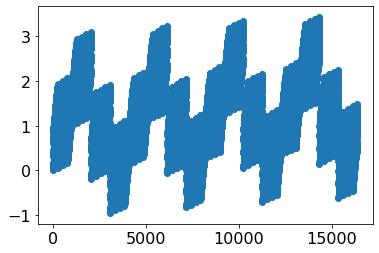

In [8]:
plt.figure()
plt.scatter(range(len(z)), z)

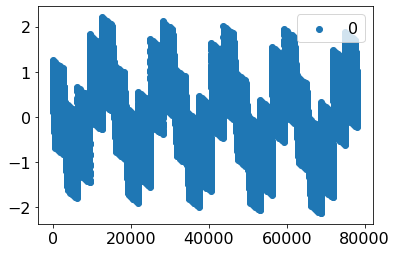

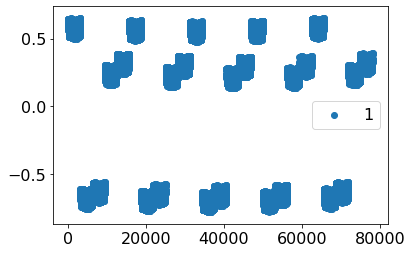

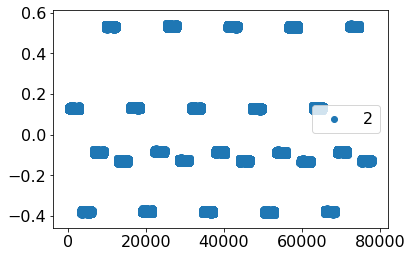

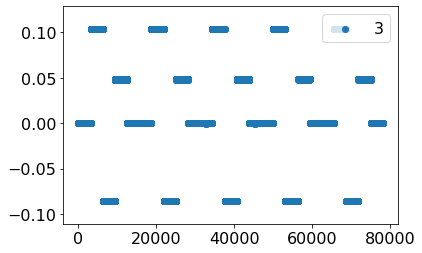

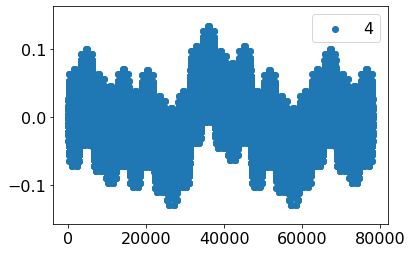

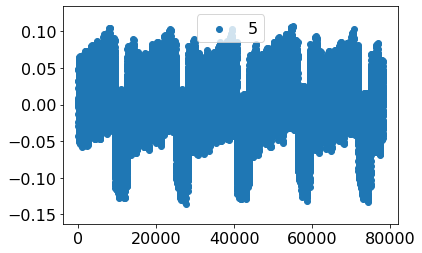

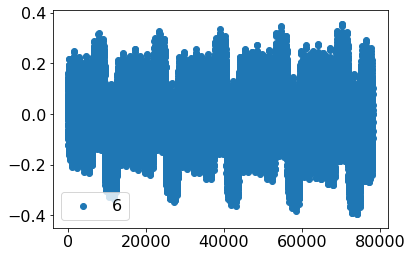

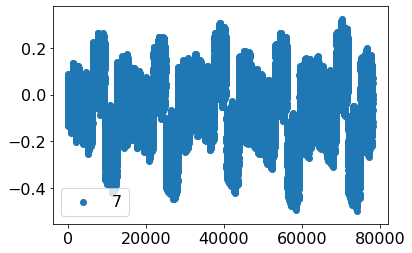

In [12]:
degs = range(8)
for deg in degs:
    plt.figure()
    rp_int = polyfit7d_interpolant(x0, x1, x2, x3, x4, x5, x6, z, deg=deg)
    prediction = rp_int([x0_val, x1_val, x2_val, x3_val, x4_val, x5_val, x6_val])
    
    plt.scatter(range(len(z_val)), prediction - z_val, label=deg)
    plt.legend()
    plt.show()
    plt.close()

In [10]:
test_point = [np.array([0.1]), np.array([0.2]), np.array([0.3]), np.array([0.4]), np.array([0.5]), np.array([0.6]), np.array([0.7])]

In [20]:
rp_int = polyfit7d_interpolant(x0, x1, x2, x3, x4, x5, x6, z, deg=3)


In [21]:
%%timeit
rp_int(test_point)

1.84 ms ± 39.6 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [22]:
3**7

2187